In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-anamoly-detection/Network Anamoly Detection.docx
/kaggle/input/network-anamoly-detection/Test.txt
/kaggle/input/network-anamoly-detection/Train.txt


# About Dataset

In [2]:
data = pd.read_csv('/kaggle/input/network-anamoly-detection/Train.txt')

In [3]:
data.head(4)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21


# Assigning Column names

In [4]:
columns_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [5]:
data = np.array(data)

In [6]:
df = pd.DataFrame(data,columns=columns_names)
df.sample(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
86509,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.02,0.09,0.0,0.0,1.0,1.0,0.0,0.0,neptune,20
106223,0,tcp,ftp_data,SF,22,0,0,0,0,0,...,0.12,0.64,0.12,0.0,0.63,0.0,0.0,0.0,normal,14
108163,0,tcp,http,SF,209,770,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,21
86415,0,tcp,http,SF,237,10757,0,0,0,0,...,1.0,0.0,0.07,0.04,0.0,0.0,0.0,0.0,normal,21


# About the Dataset

In [7]:
df.shape

(125972, 43)

In [8]:
print('Information of Data','\n')
print(df.info(),'\n')

Information of Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     125972 non-null  object
 1   protocol_type                125972 non-null  object
 2   service                      125972 non-null  object
 3   flag                         125972 non-null  object
 4   src_bytes                    125972 non-null  object
 5   dst_bytes                    125972 non-null  object
 6   land                         125972 non-null  object
 7   wrong_fragment               125972 non-null  object
 8   urgent                       125972 non-null  object
 9   hot                          125972 non-null  object
 10  num_failed_logins            125972 non-null  object
 11  logged_in                    125972 non-null  object
 12  num_compromised              125972 non-null  obje

In [9]:
df.iloc[:,:10].describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot
count,125972,125972,125972,125972,125972,125972,125972,125972,125972,125972
unique,2981,3,70,11,3341,9326,2,3,4,28
top,0,tcp,http,SF,0,0,0,0,0,0
freq,115954,102688,40338,74944,49392,67966,125947,124882,125963,123301


In [10]:
df.iloc[:,10:20].describe()

,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds
count,125972,125972,125972,125972,125972,125972,125972,125972,125972,125972
unique,6,2,88,2,3,82,35,3,10,1
top,0,0,0,0,0,0,0,0,0,0
freq,125850,76120,124686,125803,125892,125323,125685,125925,125601,125972


In [11]:
df.iloc[:,20:30].describe()

,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate
count,125972,125972,125972,125972,125972.0,125972.0,125972.0,125972.0,125972.0,125972.0
unique,2,2,512,509,89.0,86.0,82.0,62.0,101.0,95.0
top,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0
freq,125971,124785,27763,25398,86828.0,88753.0,109782.0,109766.0,76811.0,76216.0


In [12]:
df.iloc[:,30:42].describe()

,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
count,125972.0,125972,125972,125972.0,125972.0,125972.0,125972.0,125972.0,125972.0,125972.0,125972.0,125972
unique,60.0,256,256,101.0,101.0,101.0,75.0,101.0,100.0,101.0,101.0,23
top,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
freq,97573.0,74099,35993,49059.0,46989.0,63023.0,86903.0,81385.0,85359.0,103178.0,106615.0,67342


# To Do's: After going through description
1. Merge src and dsy bytes into single total bytes
2. Remove num_failed_logins because almost 99.9% are 0 in this case
3. remove it is_host login becasuse 100% are 0

In [13]:
df['total-bytes'] = df['src_bytes'] + df['dst_bytes']

In [14]:
df.drop(columns=['src_bytes','dst_bytes'],axis=1,inplace=True)

In [15]:
df.drop(columns=['is_host_login','num_failed_logins'],axis=1,inplace=True)

In [16]:
df.shape

(125972, 40)

In [17]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,125962,125963,125964,125965,125966,125967,125968,125969,125970,125971
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
protocol_type,udp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,udp,tcp,tcp,tcp
service,other,private,http,http,private,private,private,remote_job,private,private,...,http,private,smtp,private,http,private,private,smtp,klogin,ftp_data
flag,SF,S0,SF,SF,REJ,S0,S0,S0,S0,REJ,...,SF,S0,SF,S0,SF,S0,SF,SF,S0,SF
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
logged_in,0,0,1,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
num_compromised,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocessing Categorical features

In [18]:
top_services = df['service'].value_counts().head(5)
all_services = np.array(df['service'])
all_services = [service if service in top_services else 'other' for service in all_services]
all_services = pd.DataFrame(all_services)
df['service'] = all_services
df.head()

,duration,protocol_type,service,flag,land,wrong_fragment,urgent,hot,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,total-bytes
0,0,udp,other,SF,0,0,0,0,0,0,...,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal,15,146
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19,0
2,0,tcp,http,SF,0,0,0,0,1,0,...,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,8385
3,0,tcp,http,SF,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,21,619
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21,0


In [19]:
top_flags = df['flag'].value_counts().head(3)
all_flags = np.array(df['service'])
all_flags = [service if service in top_flags else 'other' for service in all_flags]
all_flags = pd.DataFrame(all_flags)
df['service'] = all_flags
df.head()

,duration,protocol_type,service,flag,land,wrong_fragment,urgent,hot,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,total-bytes
0,0,udp,other,SF,0,0,0,0,0,0,...,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal,15,146
1,0,tcp,other,S0,0,0,0,0,0,0,...,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19,0
2,0,tcp,other,SF,0,0,0,0,1,0,...,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,8385
3,0,tcp,other,SF,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,21,619
4,0,tcp,other,REJ,0,0,0,0,0,0,...,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21,0


In [20]:
top_attacks = df['attack'].value_counts().head(5)
all_attacks = np.array(df['service'])
all_attacks = [service if service in top_attacks else 'other' for service in all_attacks]
all_attacks = pd.DataFrame(all_flags)
df['service'] = all_attacks

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
ohe = OneHotEncoder()
ct = ColumnTransformer(
  [
      ('ohe',ohe,['protocol_type','service','attack','flag'])
  ]
)

trf = ct.fit_transform(df)
trf = trf.toarray()
col_names = ct.get_feature_names_out()

df2 = pd.DataFrame(trf,columns=col_names)
df2

,ohe__protocol_type_icmp,ohe__protocol_type_tcp,ohe__protocol_type_udp,ohe__service_other,ohe__attack_back,ohe__attack_buffer_overflow,ohe__attack_ftp_write,ohe__attack_guess_passwd,ohe__attack_imap,ohe__attack_ipsweep,...,ohe__flag_REJ,ohe__flag_RSTO,ohe__flag_RSTOS0,ohe__flag_RSTR,ohe__flag_S0,ohe__flag_S1,ohe__flag_S2,ohe__flag_S3,ohe__flag_SF,ohe__flag_SH
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125968,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125969,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.drop(columns=['protocol_type','service','attack','flag'],axis=1,inplace=True)

In [24]:
df = pd.concat([df,df2],axis=1)

In [25]:
df.shape

(125972, 74)

# Elbow Function

**Elbow function helps us determine the total number of n_clustors**

In [26]:
from sklearn.cluster import KMeans

In [27]:
expected_clustors = range(1,20)
wcss = []
for i in expected_clustors:
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

# Plot WCSS or Inertia 

In [28]:
import matplotlib.pyplot as plt 

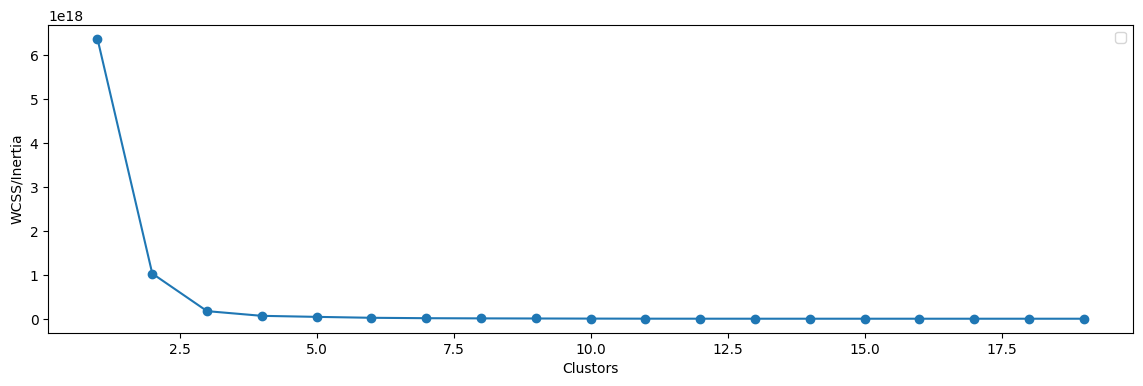

In [29]:
plt.figure(figsize=(14,4))
plt.plot(expected_clustors,wcss,marker='o')
plt.xlabel('Clustors')
plt.ylabel('WCSS/Inertia')
plt.legend()
plt.show()

**From this graph we should take 3 as the clustors number because here the graph is started stablelizing**

# Train Model with n_clustors=3

In [30]:
kmeans2 = KMeans(n_clusters=3)

In [31]:
kmeans2.fit(df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

# Measure the Performance

**We use silhouette_score to measure the performance it tells us how the point similar to it's clustor**

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
avg_silhouette_score = silhouette_score(df,kmeans2.labels_)

In [34]:
print('The avg_silhouette_score is ',avg_silhouette_score)

The avg_silhouette_score is  0.9999189987845539
